## Import the necessary libraries

In [3]:
#from uts_ad import residual_outlier_detection
#from uts_ad import plot_anomaly_data22
from uts_ad import*
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
from datetime import datetime
import random as randn
import seaborn as sns
from matplotlib.dates import DateFormatter
%matplotlib inline

In [4]:
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected= True)
cf.go_offline()

## Data loading and formating
### Dataset from 

In [5]:

df = pd.read_csv('BTC-USD.csv', sep= ',')
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438,38743.273438,20288500328
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000,41500.875000,29412210792
2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063,41441.164063,19652846215


In [6]:
# Check data type
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2022-02-01 to 2022-02-28
Data columns (total 6 columns):
Open         28 non-null float64
High         28 non-null float64
Low          28 non-null float64
Close        28 non-null float64
Adj Close    28 non-null float64
Volume       28 non-null int64
dtypes: float64(5), int64(1)
memory usage: 1.5 KB


In [ ]:
## Check the statistics

In [8]:
df_shape = df.shape
df.info()
print("--------------------------------------------\n")
print(df.shape)

print('Number of data points or number of rows: {0}'. format(df_shape [0]))
print('Number of variables, features or columns of dataset : {0}'. format(df_shape [1]))
print("----------------------------------------------\n")
print(df.describe()) # Compute the statistics parameters 



<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2022-02-01 to 2022-02-28
Data columns (total 6 columns):
Open         28 non-null float64
High         28 non-null float64
Low          28 non-null float64
Close        28 non-null float64
Adj Close    28 non-null float64
Volume       28 non-null int64
dtypes: float64(5), int64(1)
memory usage: 1.5 KB
--------------------------------------------

(28, 6)
Number of data points or number of rows: 28
Number of variables, features or columns of dataset : 6
----------------------------------------------

               Open          High           Low         Close     Adj Close  \
count     28.000000     28.000000     28.000000     28.000000     28.000000   
mean   40588.585380  41616.687082  39637.587472  40714.562221  40714.562221   
std     2547.588470   2423.435553   2600.924314   2519.395212   2519.395212   
min    36944.804688  37154.601563  34459.218750  36952.984375  36952.984375   
25%    38400.844727  39571.352539  

In [30]:
# Check the index
df.index # dataset indices
idxmin = np.min(df.index) # start index
idxmax = np.max(df.index) # end index
print(df.index)
print(idxmin)
print(idxmax)

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)
2022-02-01 00:00:00
2022-02-28 00:00:00


In [31]:
# Set or reset dateset indices 
df_index = pd.date_range(start= idxmin, end= idxmax, freq= 'D')
df_index
# call data reindexing function

# df =df.reindex(df_index)


DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', freq='D')

In [ ]:
# Missing data handling 
# Call interpolate function to fill the missing values
#df.interpolate(method='linear', limit_direction= 'forward', axis=0, inplace=True)
#df.head(10)

In [11]:
# Check for completeness
np.mean(np.isnan(df))

Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

## Exploratory Data Analysis (EDA)

In [20]:
#Check data columns and perform some feature selection
print(df.columns)
# remove the last two columns from data.
feat_col =df.columns[:-2]
print(feat_col)

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Index(['Open', 'High', 'Low', 'Close'], dtype='object')


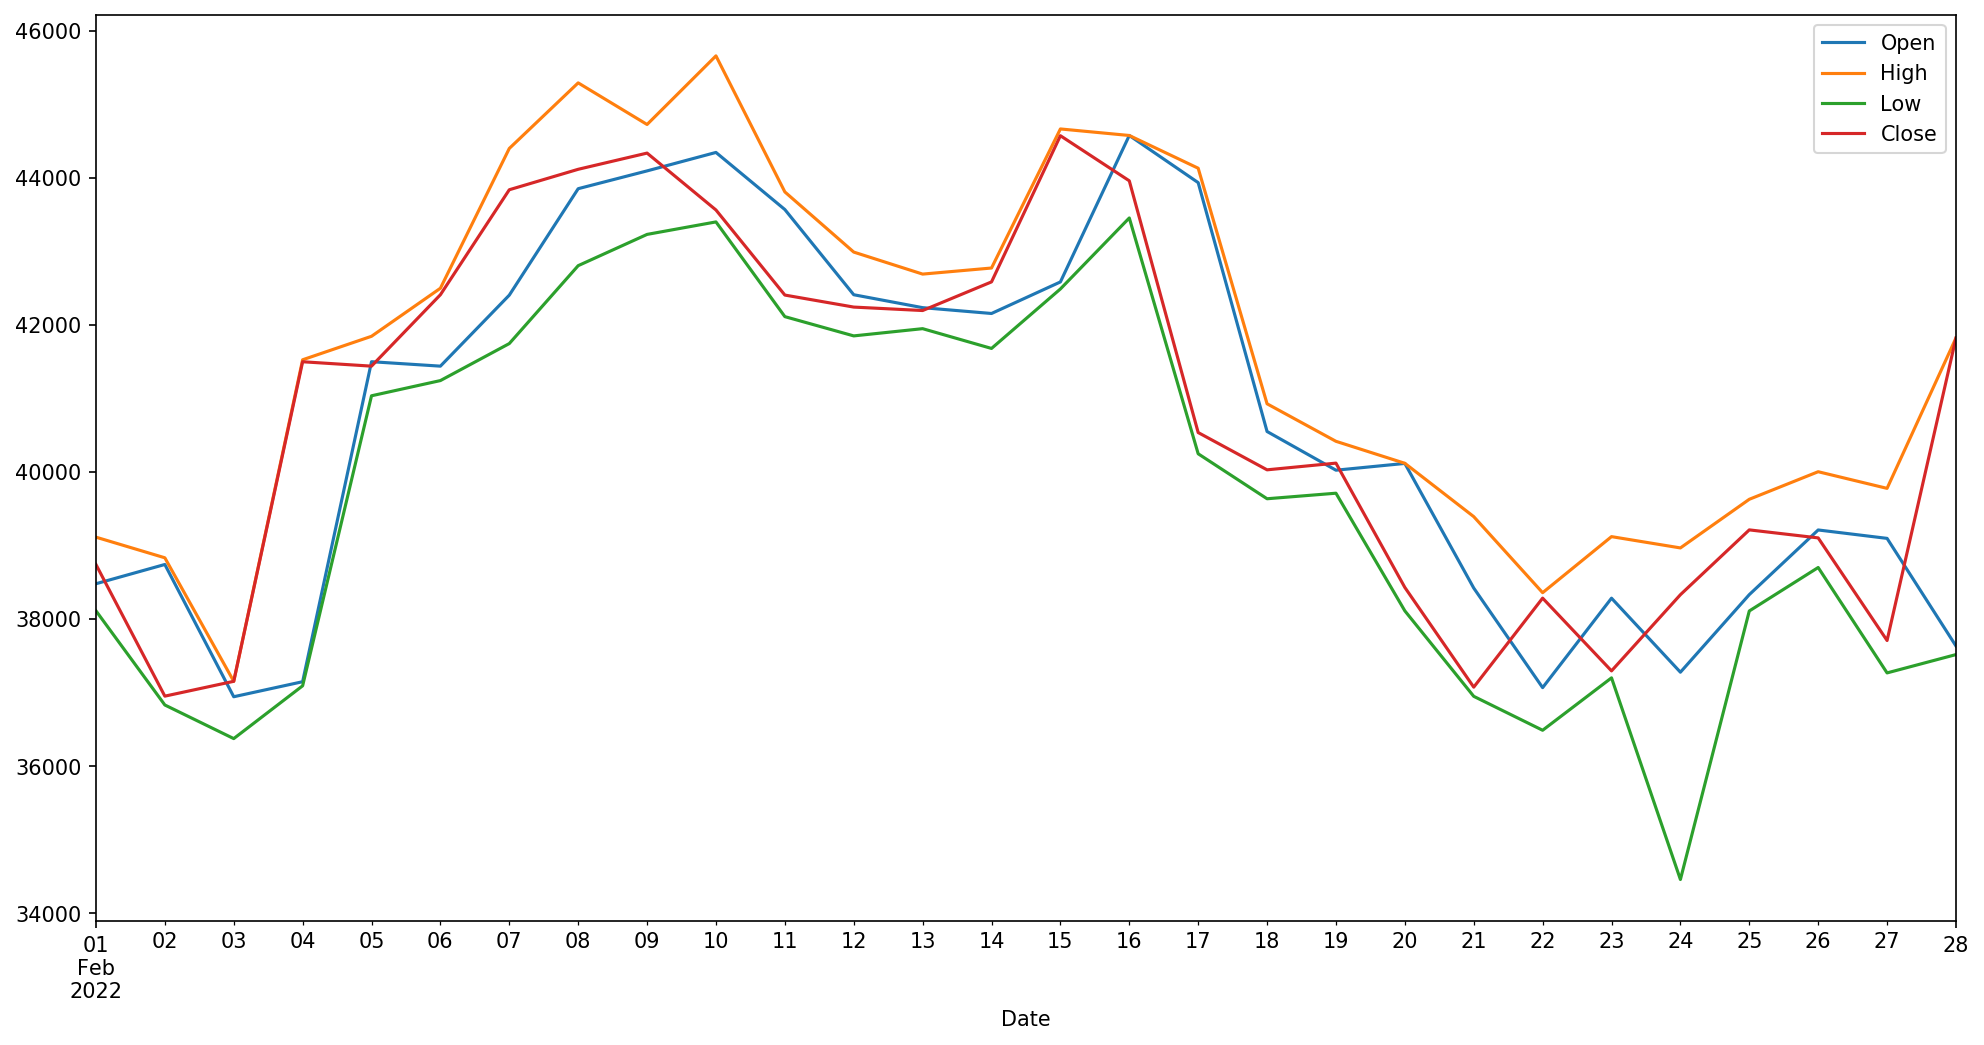

In [23]:
plt.figure(figsize=(16, 8), dpi=150)
for cl in feat_col:
    df[cl].plot()
plt.legend()
plt.show()

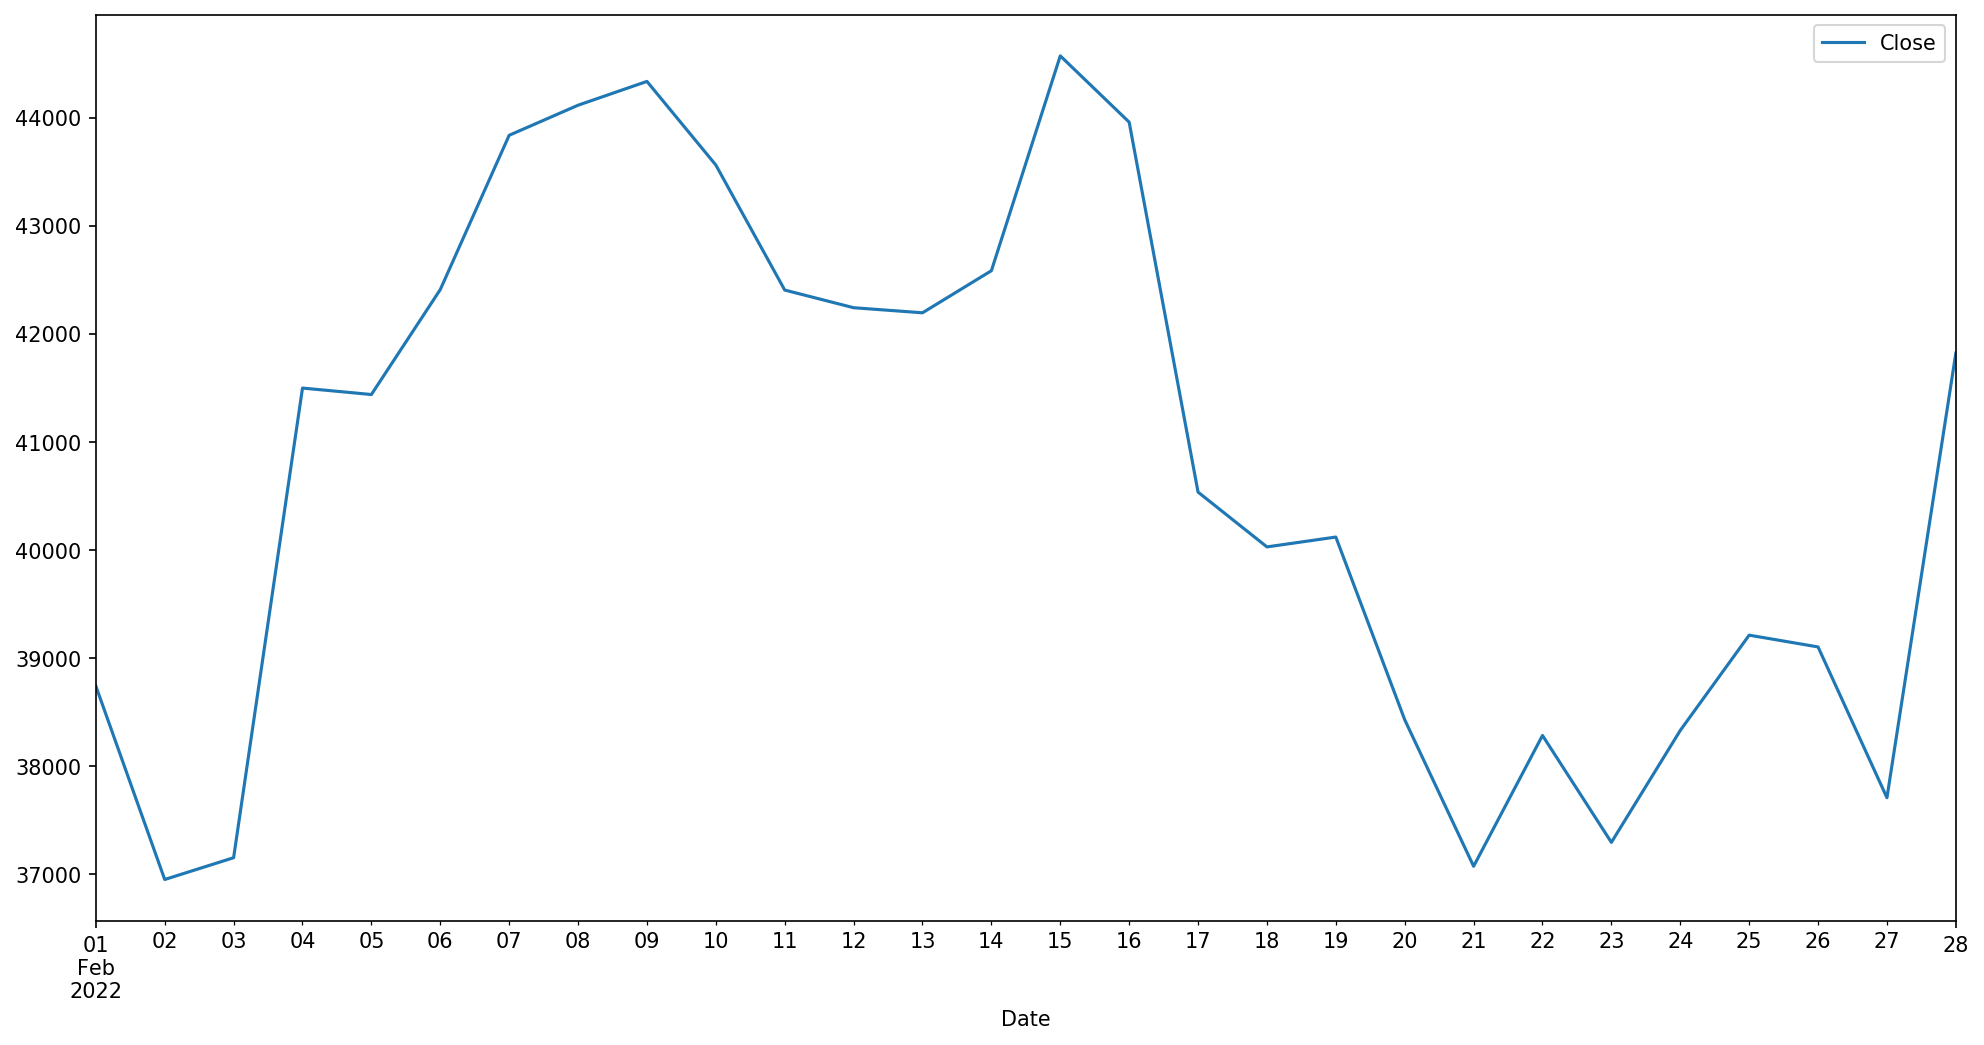

In [24]:
# single plot
plt.figure(figsize=(16, 8), dpi=150)
df['Close'].plot()
#df['Open'].plot()
#df['High'].plot()
#df['Low'].plot()
plt.legend()
plt.show()

No handles with labels found to put in legend.


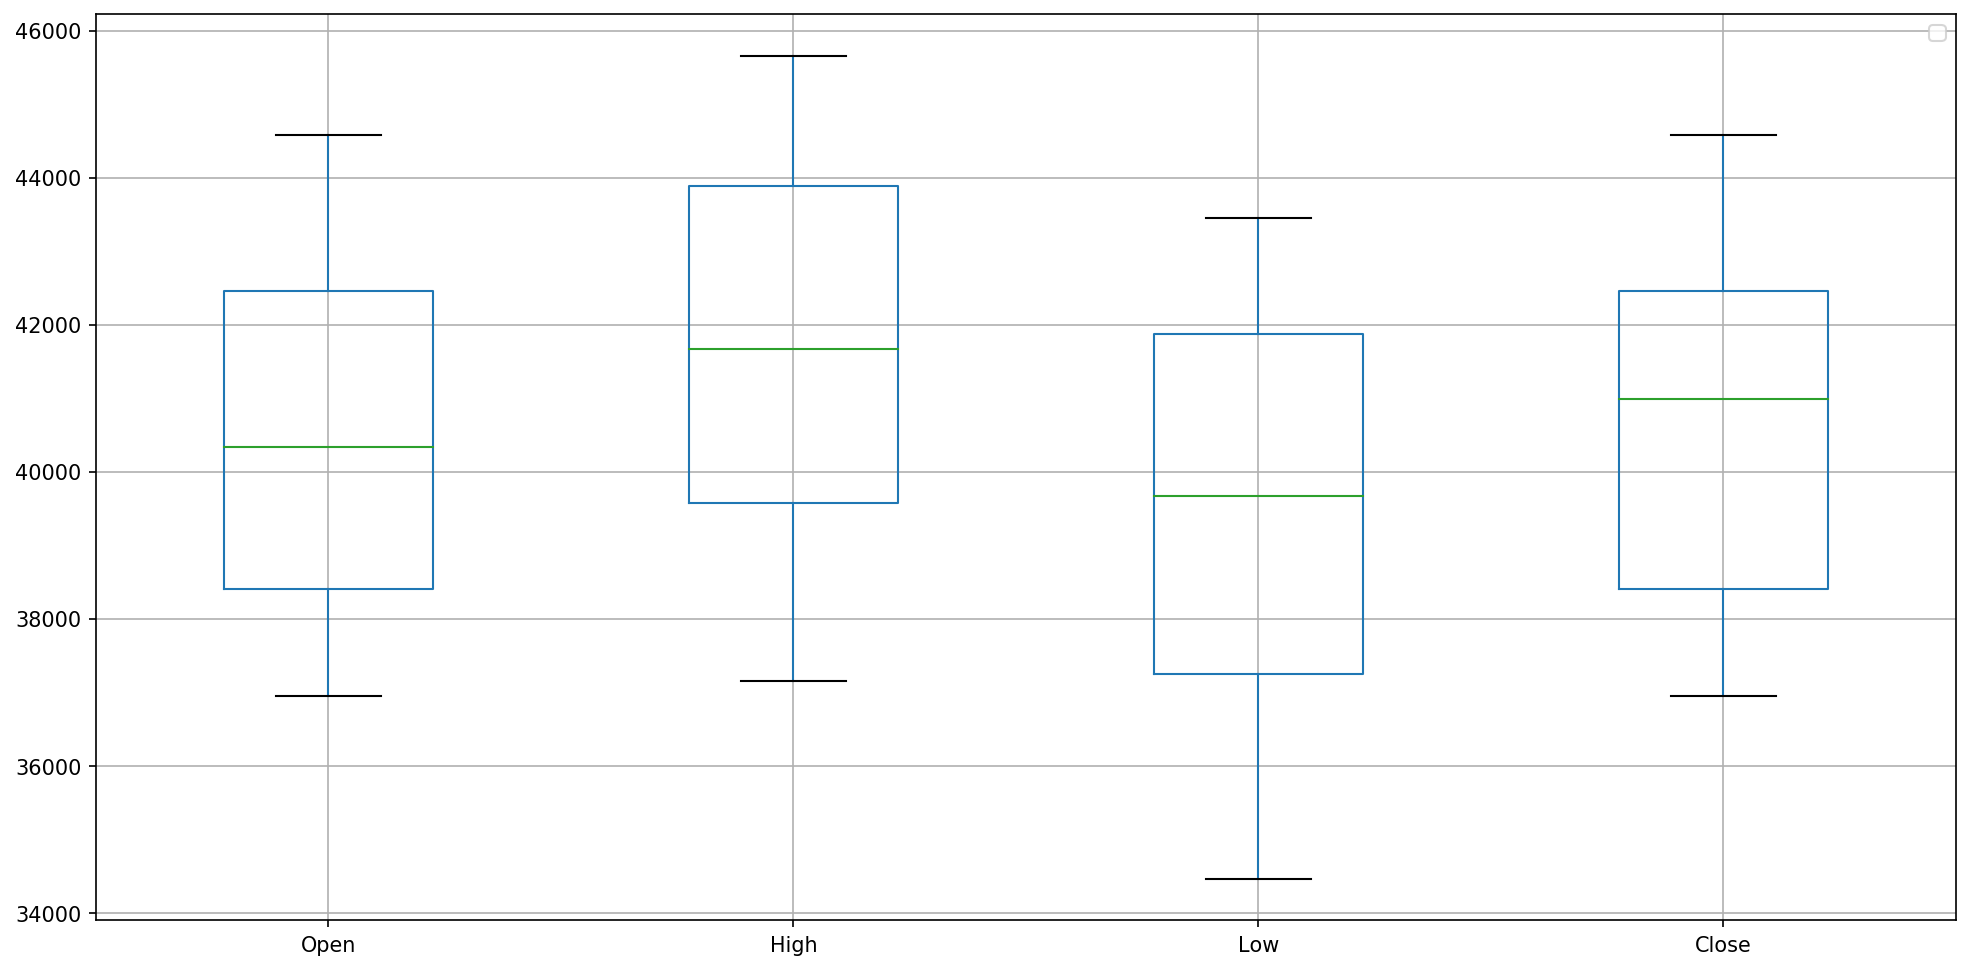

In [27]:
# Perform boxplot
plt.figure(figsize=(16, 8), dpi=150)
df[feat_col].boxplot()
plt.legend()
plt.show()

In [175]:
pp= residual_outlier_detection(df['Low'],20, 1.5)
df['Low'][pp]

Date
2022-02-02    36832.730469
2022-02-03    36375.539063
2022-02-22    36488.933594
2022-02-24    34459.218750
Name: Low, dtype: float64

In [176]:
df['Low'].head()

Date
2022-02-01    38113.664063
2022-02-02    36832.730469
2022-02-03    36375.539063
2022-02-04    37093.628906
2022-02-05    41038.097656
Name: Low, dtype: float64

In [177]:
# Outlier plot

# Plot min anomalies
series = df['Low']
outlier_df = df[pp]['Low']
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

In [63]:
# check the indices of 
series.index

DatetimeIndex(['2022-02-01', '2022-02-02', '2022-02-03', '2022-02-04',
               '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
               '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12',
               '2022-02-13', '2022-02-14', '2022-02-15', '2022-02-16',
               '2022-02-17', '2022-02-18', '2022-02-19', '2022-02-20',
               '2022-02-21', '2022-02-22', '2022-02-23', '2022-02-24',
               '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [64]:
outlier_df.index

DatetimeIndex(['2022-02-02', '2022-02-03', '2022-02-22', '2022-02-24'], dtype='datetime64[ns]', name='Date', freq=None)

In [178]:
# Plot  anomalies
series = df['Low']
outlier_df = df['Low'][pp]
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()

In [65]:
df[pp]

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375,36952.984375,19155189416
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563,37154.601563,18591534769
2022-02-22,37068.769531,38359.855469,36488.933594,38286.027344,38286.027344,25493150450
2022-02-24,37278.566406,38968.839844,34459.218750,38332.609375,38332.609375,46383802093


In [179]:
dfcol = ['Open', 'High', 'Low', 'Close']
outlier_list = []
for col in dfcol:    
    pp= residual_outlier_detection(df[col],20, 1.5)
    pp=df[col][pp]
    outlier_list.append(pp)
outlier_list
    


[Date
 2022-02-03    36944.804688
 2022-02-04    37149.265625
 2022-02-22    37068.769531
 2022-02-24    37278.566406
 Name: Open, dtype: float64, Date
 2022-02-03    37154.601563
 2022-02-22    38359.855469
 Name: High, dtype: float64, Date
 2022-02-02    36832.730469
 2022-02-03    36375.539063
 2022-02-22    36488.933594
 2022-02-24    34459.218750
 Name: Low, dtype: float64, Date
 2022-02-02    36952.984375
 2022-02-03    37154.601563
 2022-02-21    37075.281250
 2022-02-23    37296.570313
 Name: Close, dtype: float64]

In [180]:
# Plot  anomalies
outlier_df =outlier_list[1]
series = df['High']
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()


In [99]:
series

Date
2022-02-03    36944.804688
2022-02-04    37149.265625
2022-02-22    37068.769531
2022-02-24    37278.566406
Name: Open, dtype: float64

In [173]:
for i, (xx, yy) in enumerate(zip(dfcol, outlier_list)):
               
      # Plot  anomalies
      outlier_df =outlier_list[i]
      series = df[xx]
      
      fig = go.Figure()
         # Add outlier_df trace
      fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                        mode='markers',
                        name='Outliers Points'))
         
         #Add df trace
      fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                        name='Actual Data'))

      fig.update_layout(
         title="Actual data points vs Anomaly data points",
         xaxis_title= "Date",
         yaxis_title= str(xx),    
         font=dict(
            family="Courier New, monospace",
            size=12,
            color="RebeccaPurple"))

      fig.show()
         
    
    
    
    
    

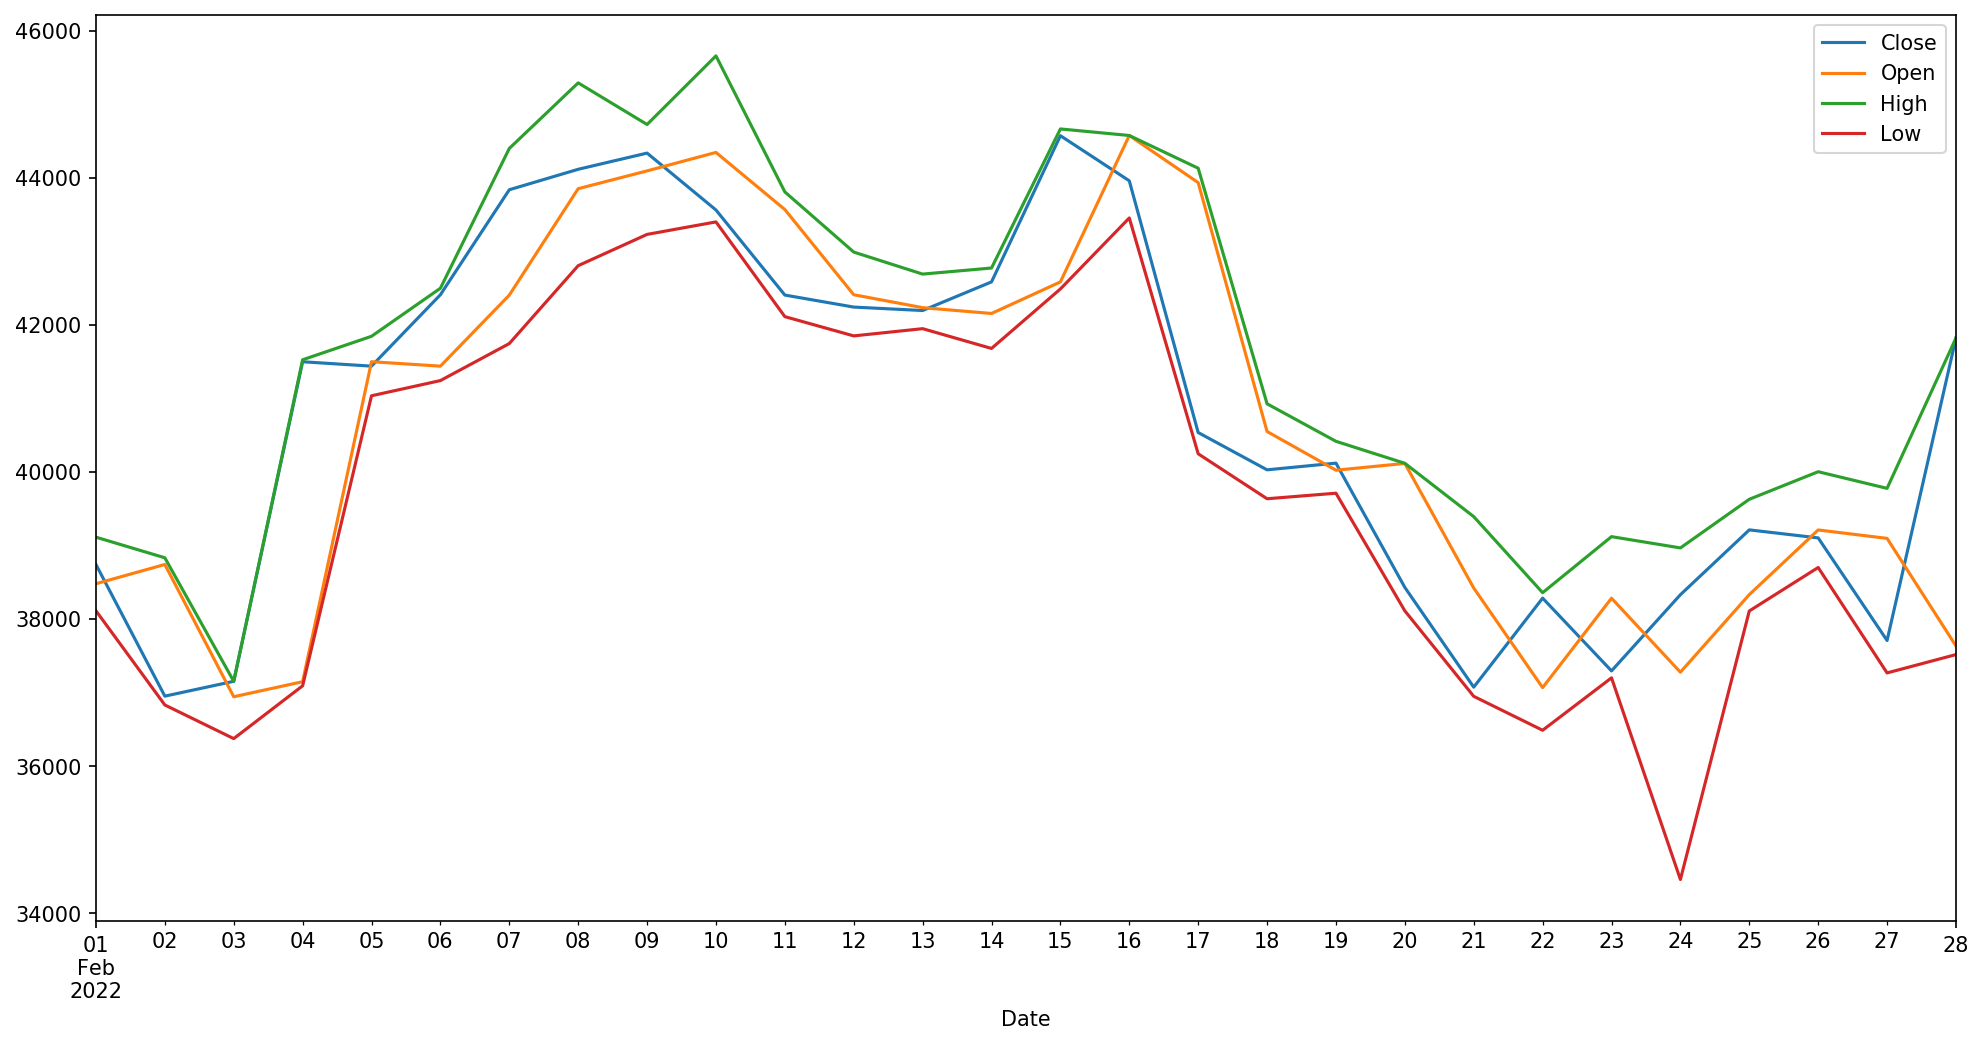

In [182]:
plt.figure(figsize=(16, 8), dpi=150)
df['Close'].plot()
df['Open'].plot()
df['High'].plot()
df['Low'].plot()
plt.legend()

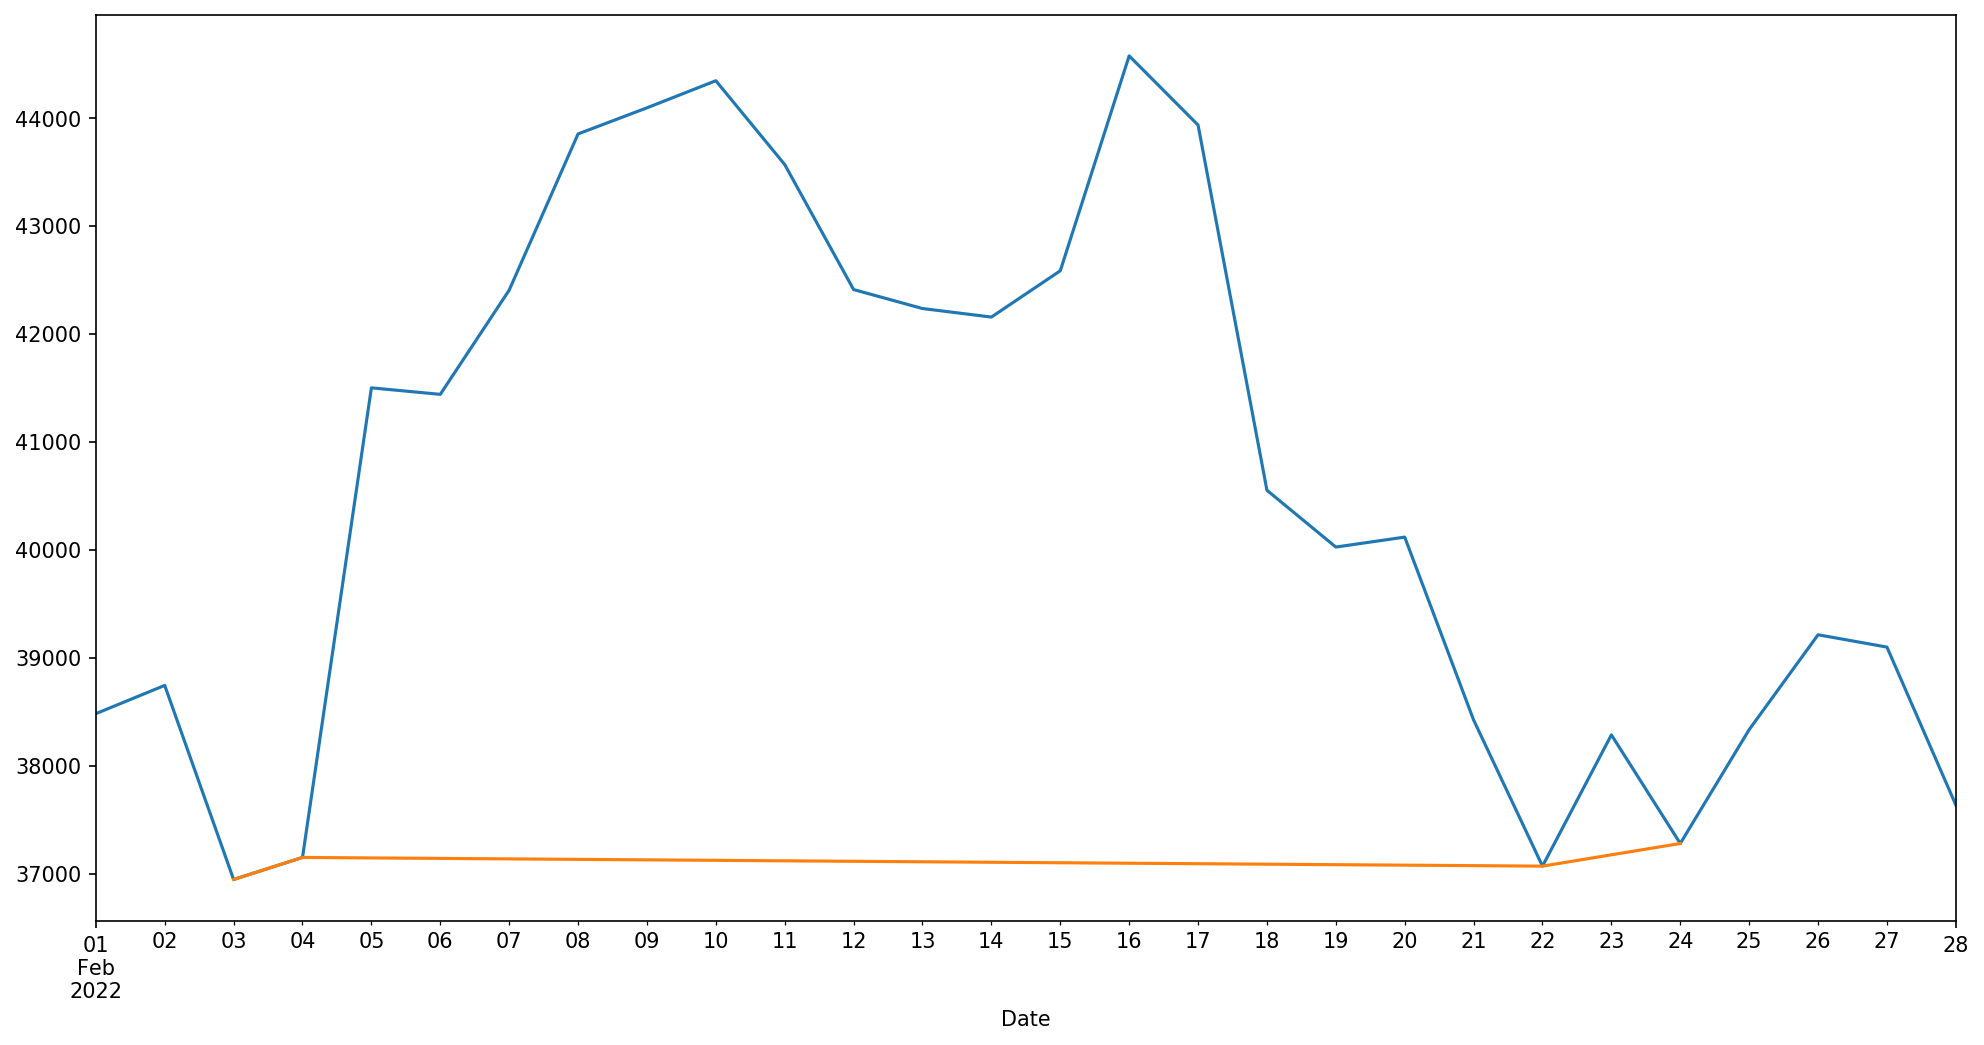

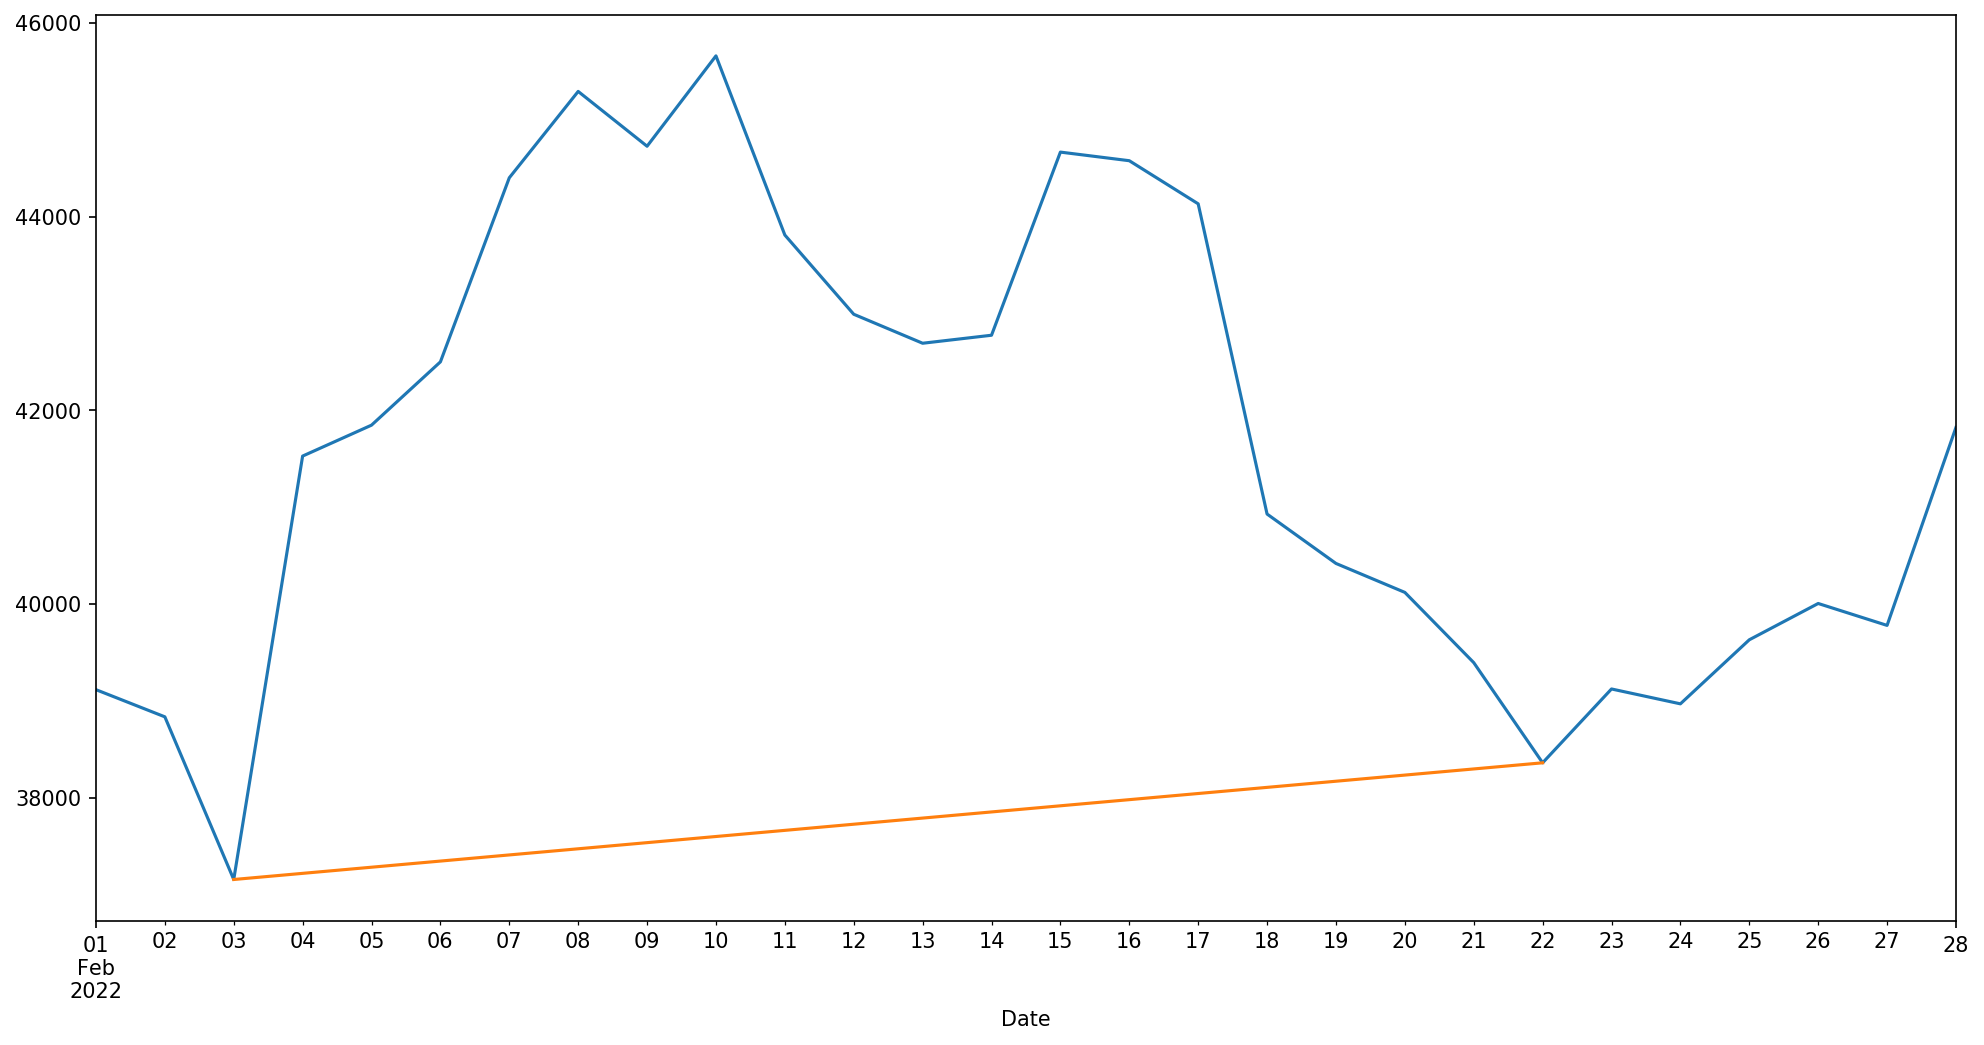

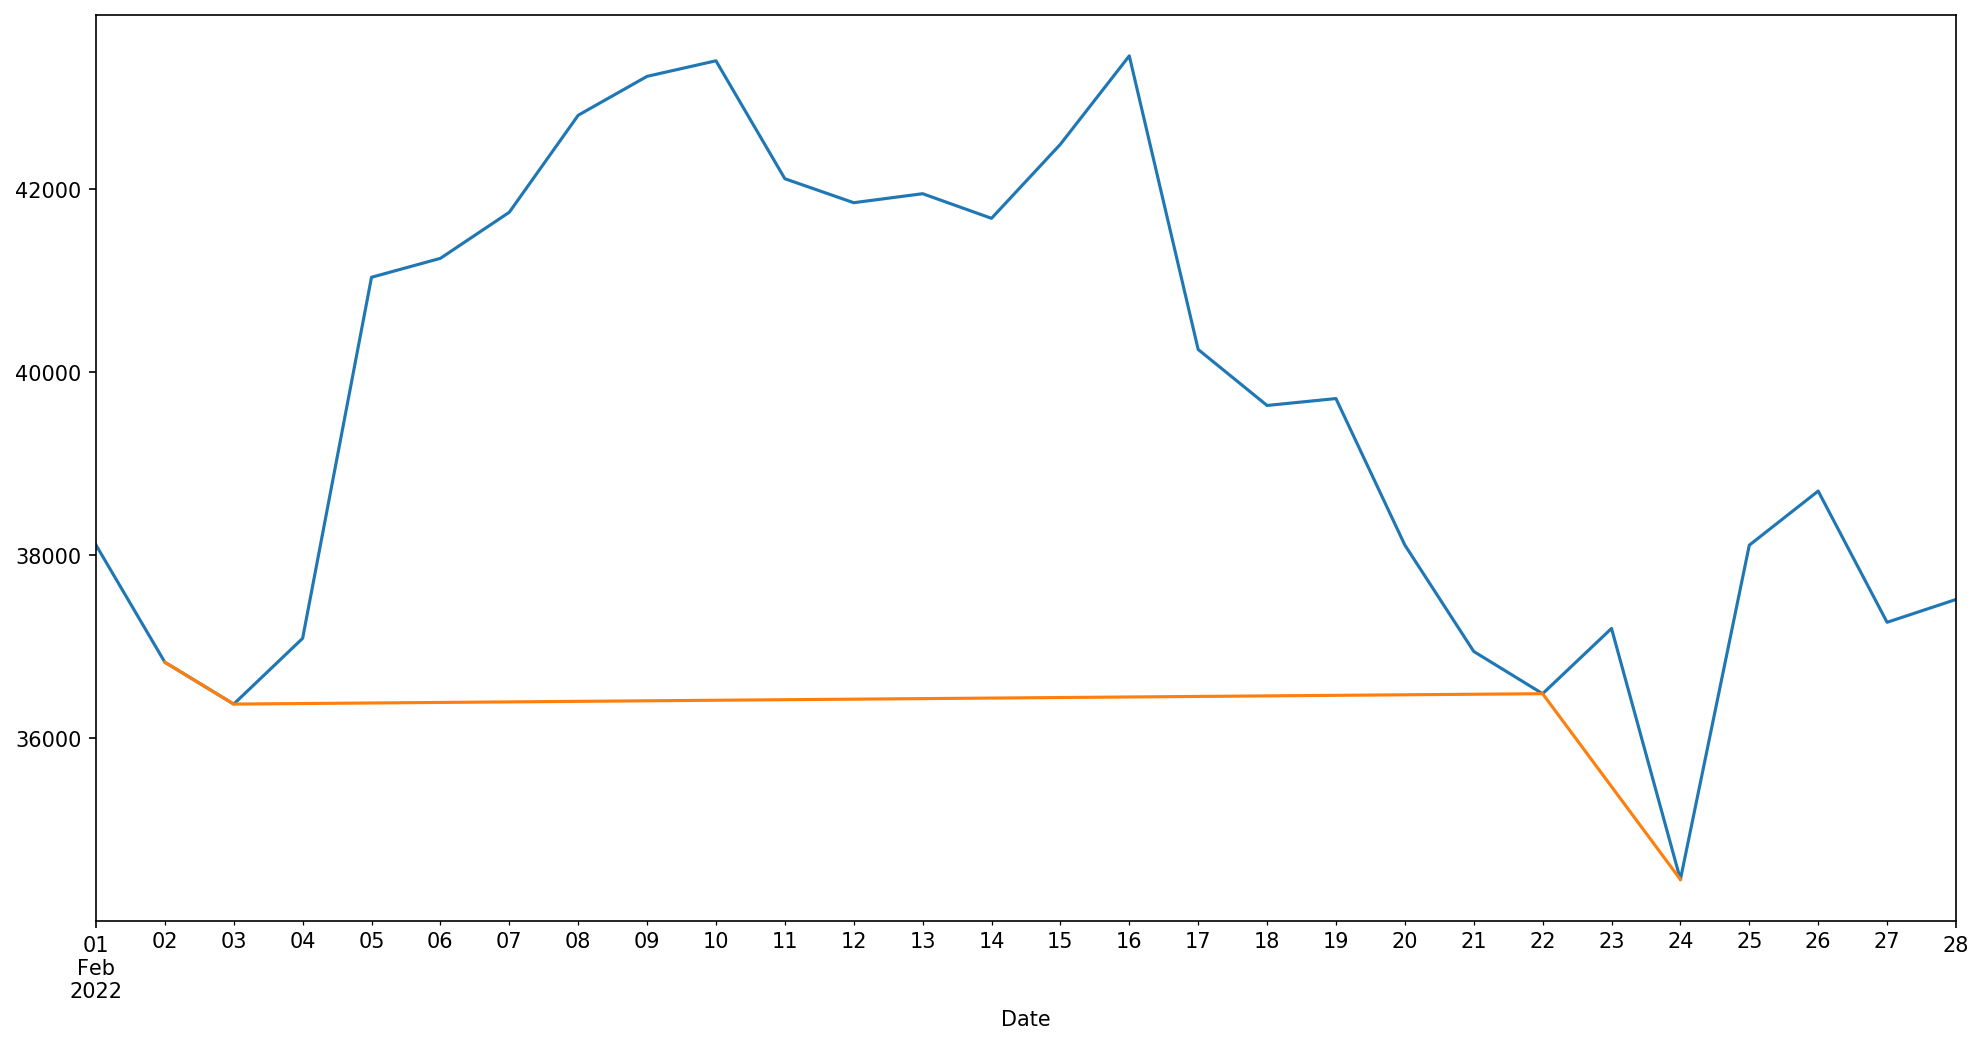

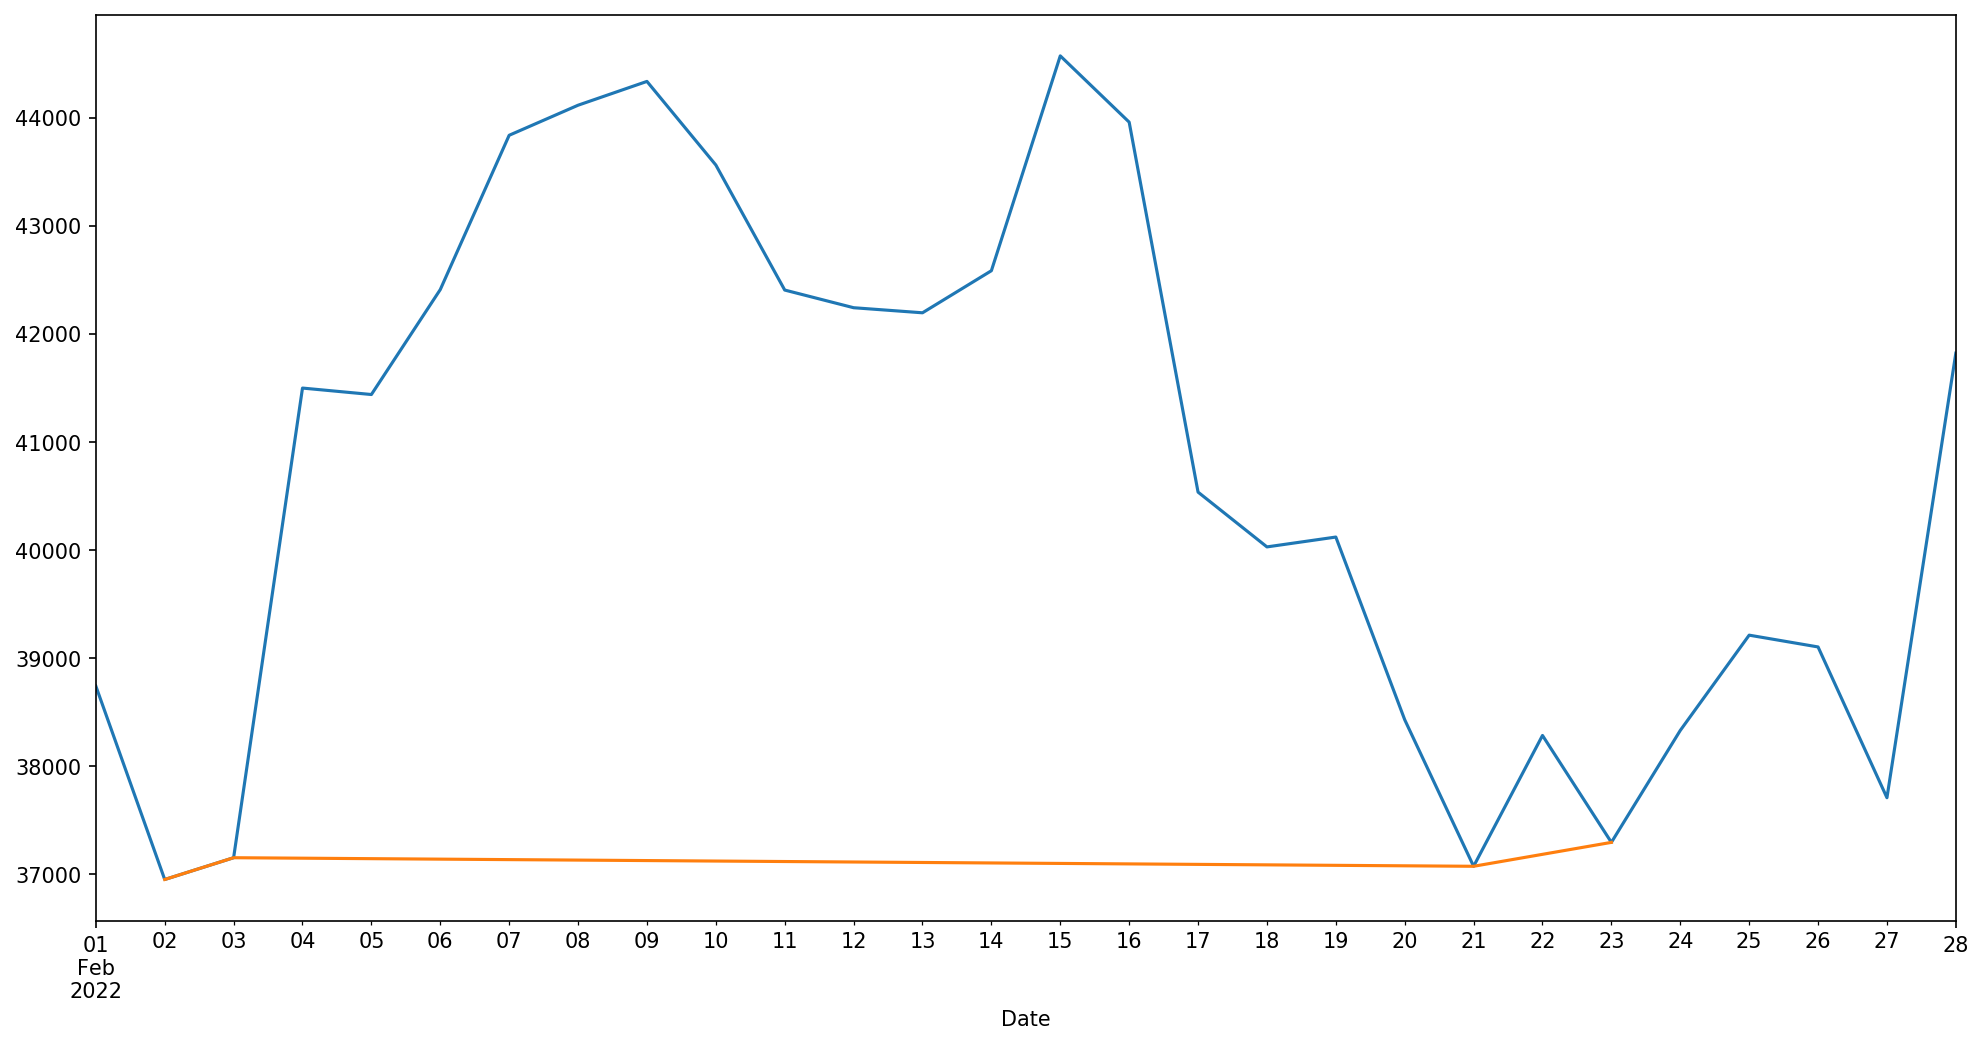

In [183]:
# Alternative way 
df2 =df.iloc[:,0:4]
outlier_list2 = []
for col in df2.columns:    
    pp2= residual_outlier_detection(df2[col],20, 1.5)
    pp2=df2[col][pp2]
    outlier_list2.append(pp2)
outlier_list2

for i, (xx, yy) in enumerate(zip(df2.columns, outlier_list2)):
               
      # Plot  anomalies
      outlier_df =outlier_list[i]
      series = df2[xx]
      plt.figure(figsize=(16, 8), dpi=150)
      series.plot()
     
      outlier_df.plot()   
    
      
   


In [184]:
#plt.figure(figsize=(16, 8), dpi=150)
#df2['Open'].plot()
#outlier_list2[0].plot()
#df2['High'].plot()
#outlier_list2[1].plot()
#df2['Low'].plot()
#outlier_list2[2].plot()
#df2['Close'].plot()
#outlier_list2[3].plot()

In [171]:
df2.head()

,Open,High,Low,Close
Date,,,,
2022-02-01,38481.765625,39115.132813,38113.664063,38743.273438
2022-02-02,38743.714844,38834.617188,36832.730469,36952.984375
2022-02-03,36944.804688,37154.601563,36375.539063,37154.601563
2022-02-04,37149.265625,41527.785156,37093.628906,41500.875000
2022-02-05,41501.480469,41847.164063,41038.097656,41441.164063


<Figure size 2400x1200 with 0 Axes>

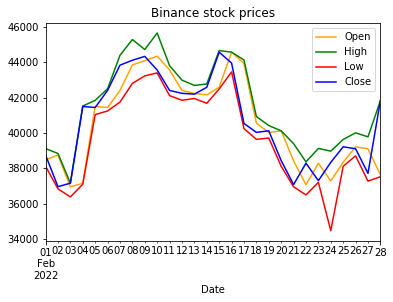

In [188]:
# Visualizing stock prices
# # to set the plot size
plt.figure(figsize=(16, 8), dpi=150)  
# using .plot method to plot stock prices.
# we have passed colors as a list
df2.plot( color=['orange', 'green', 'red', 'blue'])
  
# adding title
plt.title('Binance stock prices')
  
# adding label to x-axis
plt.xlabel('Date')
  
# adding legend.
plt.legend()

In [172]:

# Plot  anomalies for Open
series = df2['Open']
outlier_df = outlier_list2[0]
#plot_anomaly_data22(series, outlier_min)

fig = go.Figure()
    # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_df.index, y = outlier_df,
                    mode='markers',
                    
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = series.index, y = series, mode = 'lines',
                    name='Actual Data'))

   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[1].index, y = outlier_list2[1],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['High'].index, y = df2['High'], mode = 'lines',
                    name='Actual Data'))

   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[2].index, y = outlier_list2[2],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['Low'].index, y = df2['Low'], mode = 'lines',
                    name='Actual Data'))
   # Add outlier_df trace
fig.add_trace(go.Scattergl(x = outlier_list2[3].index, y = outlier_list2[3],
                    mode='markers',
                    name='Outliers Points'))
    
    #Add df trace
fig.add_trace(go.Scattergl(x = df2['Close'].index, y = df2['Close'], mode = 'lines',
                    name='Actual Data'))

fig.update_layout(
    title="Actual data points vs Anomaly data points",
    xaxis_title="Water Flow",
    yaxis_title="Time Periods",    
    font=dict(
        family="Courier New, monospace",
        size=12,
        color="RebeccaPurple"))

fig.show()